In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import pdist


In [2]:
# Charger les données
# Remplacez "path_to_data" par le chemin de votre fichier
data = pd.read_csv("/content/canada_data.csv")

# Filtrer les features cibles
features = data[['valence_intensity', 'fear_intensity', 'anger_intensity',
                 'happiness_intensity', 'sadness_intensity']]


In [3]:
features = features.sample(n=5000, random_state=42)


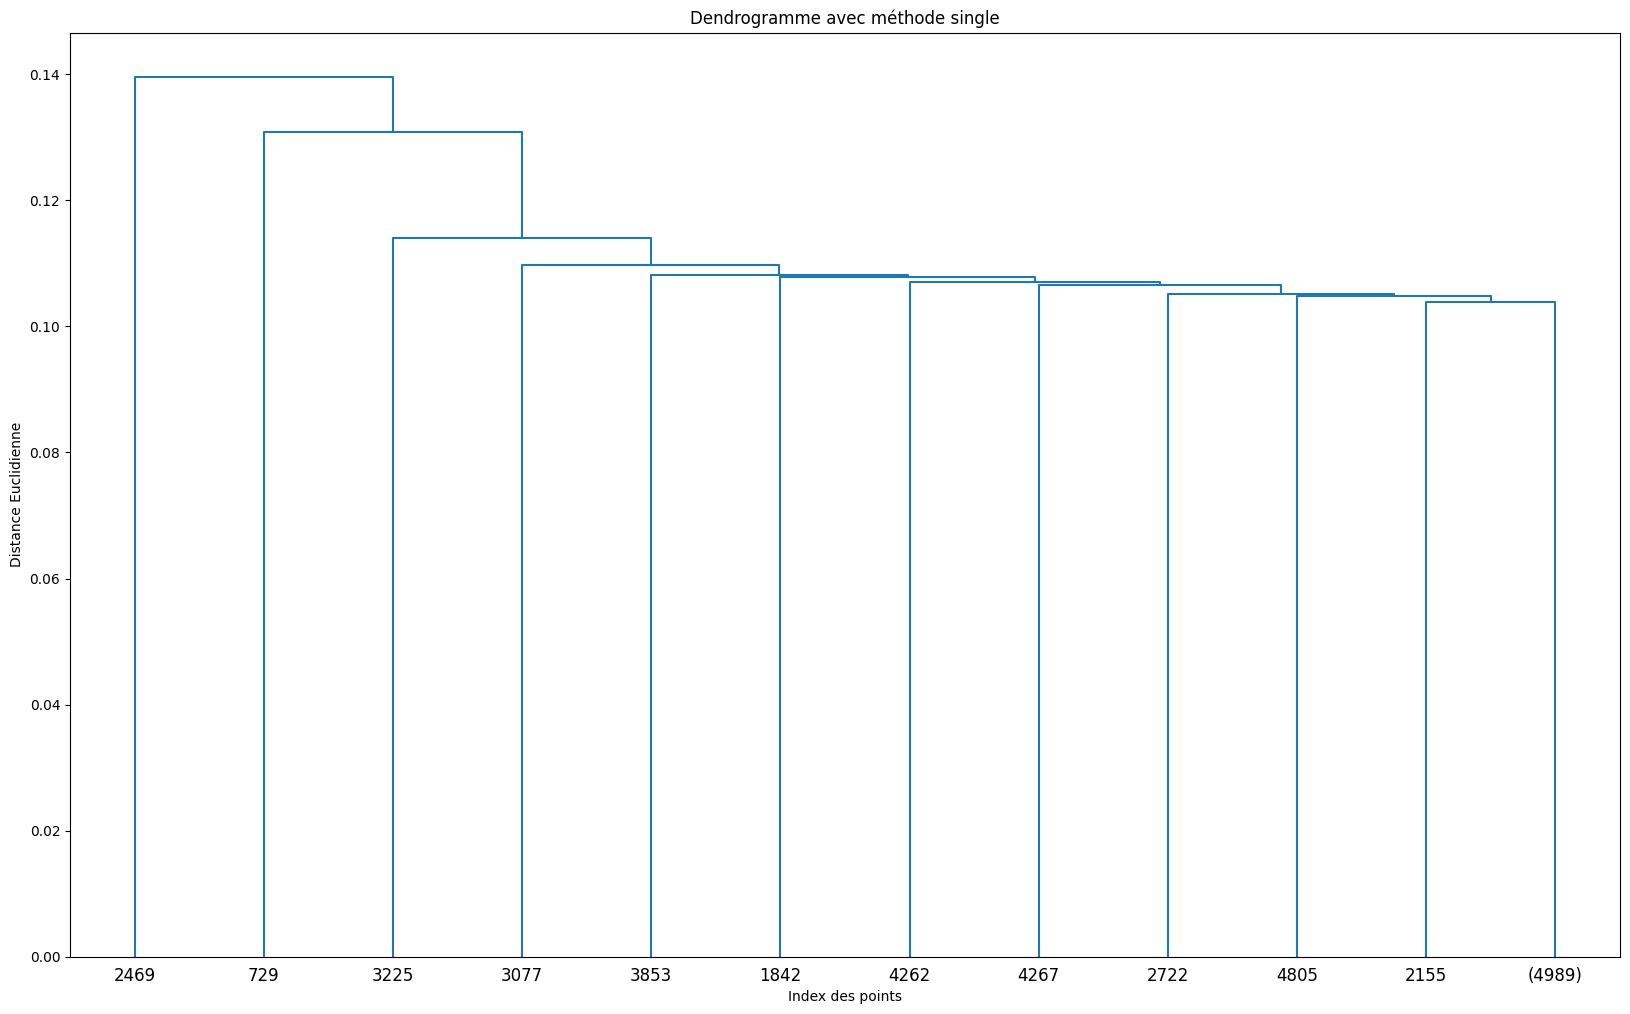

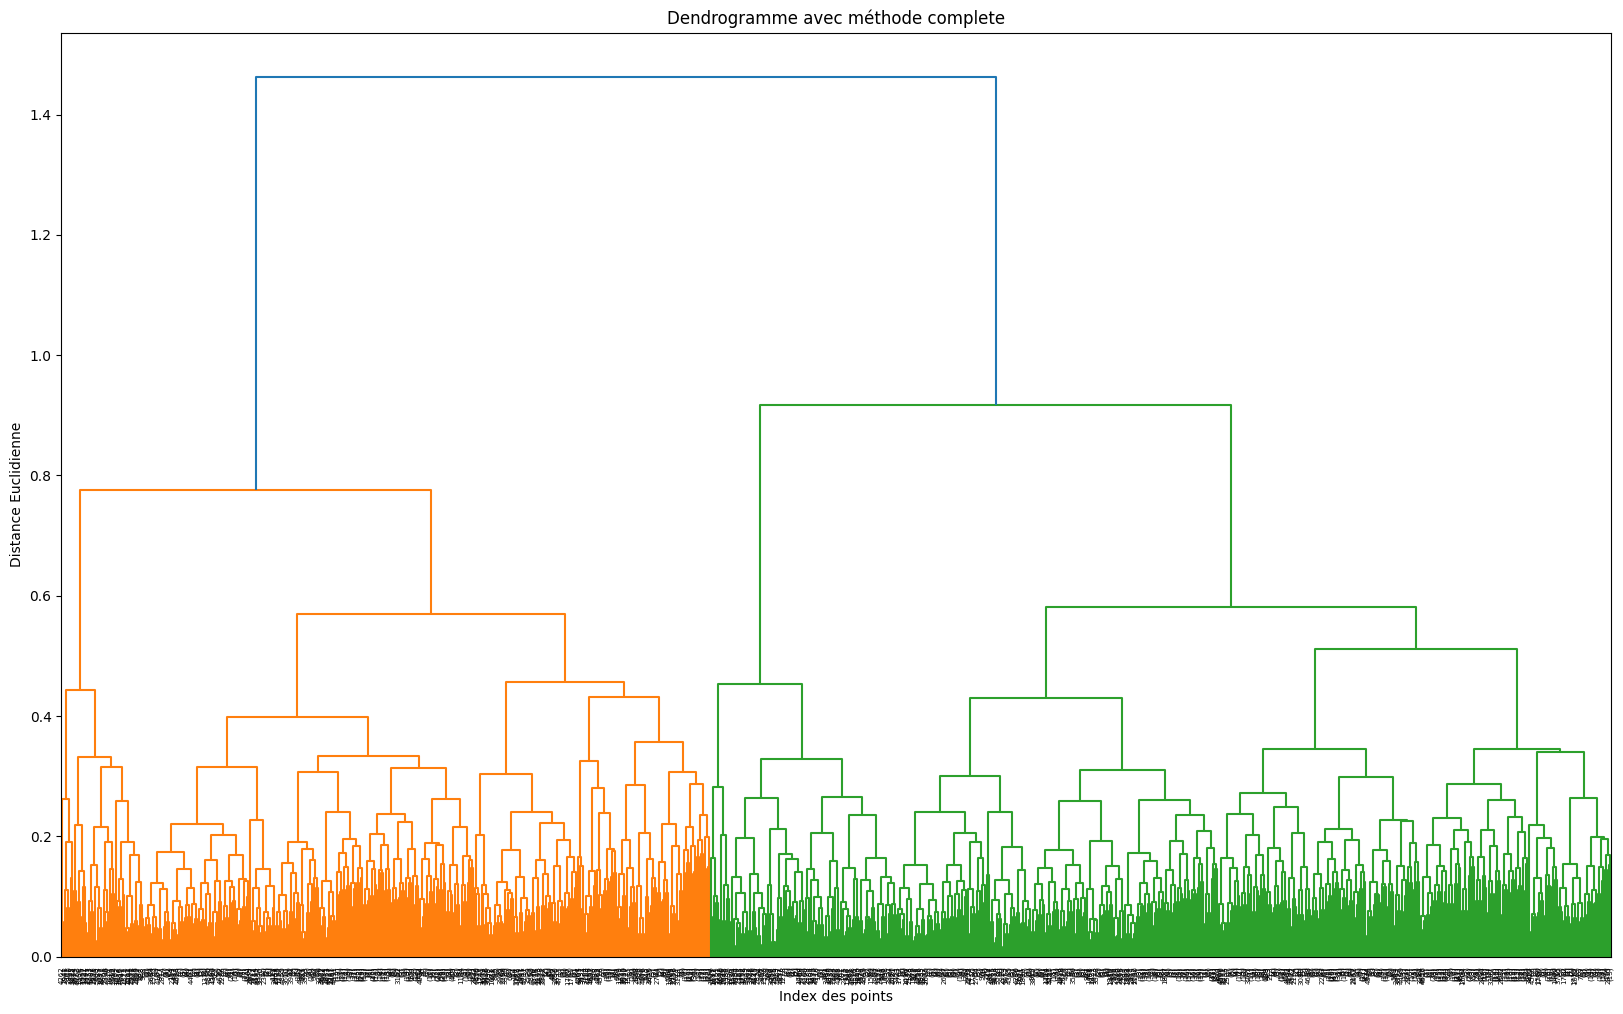

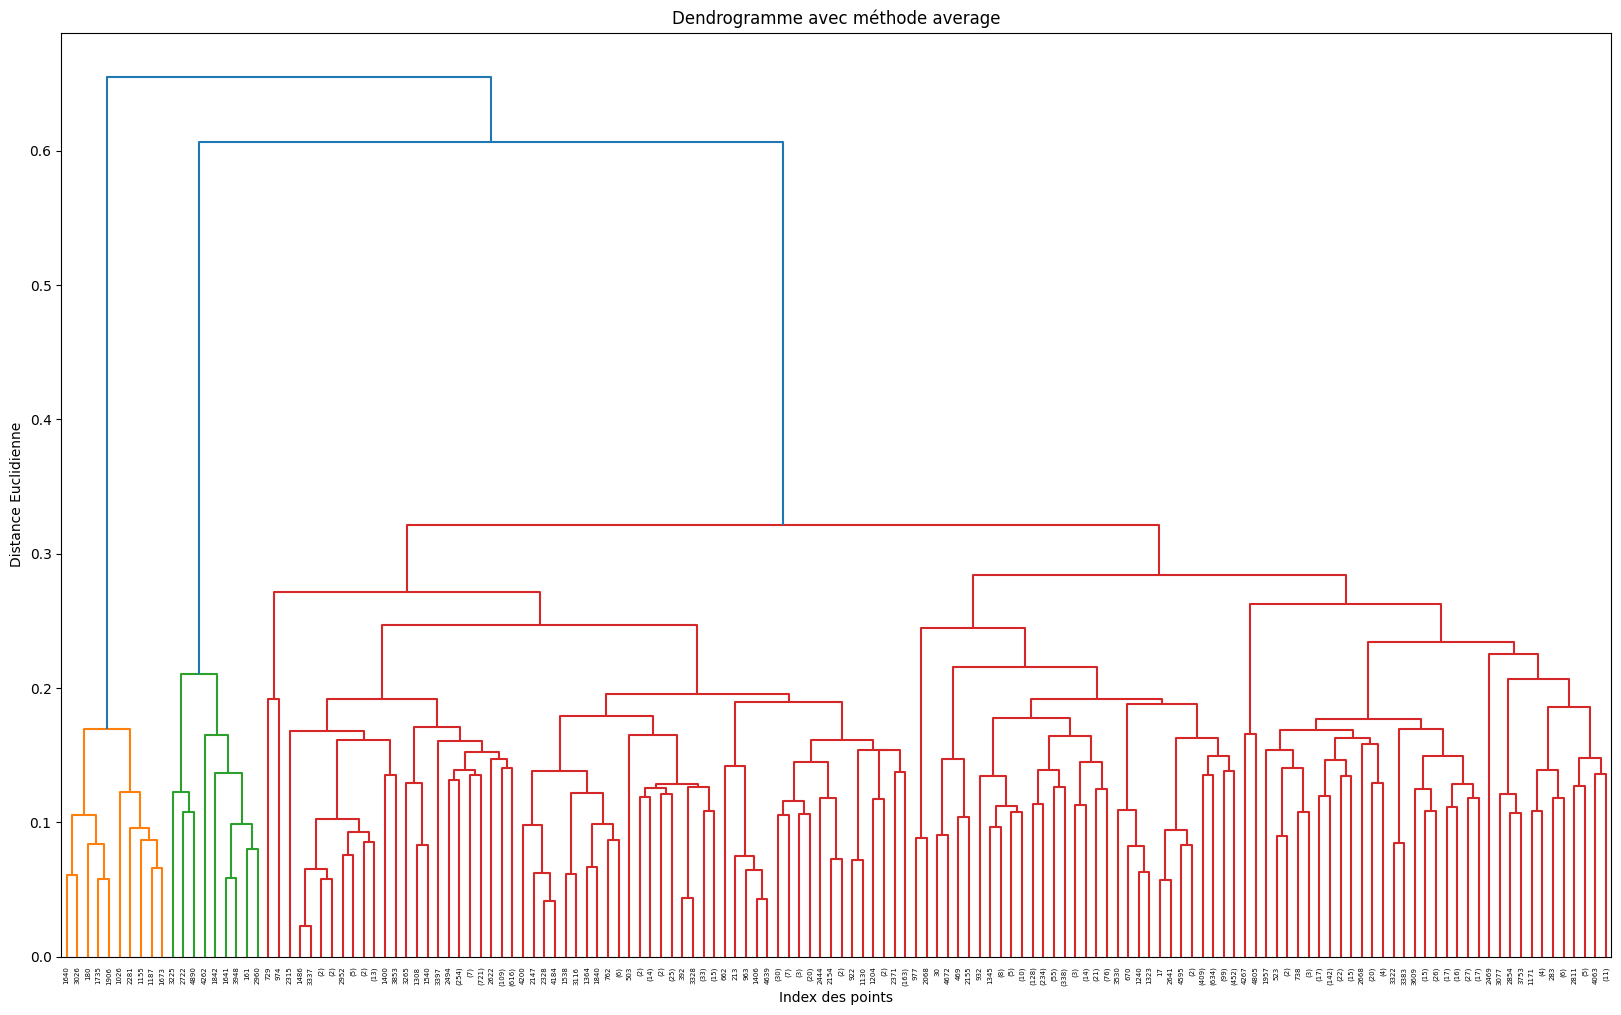

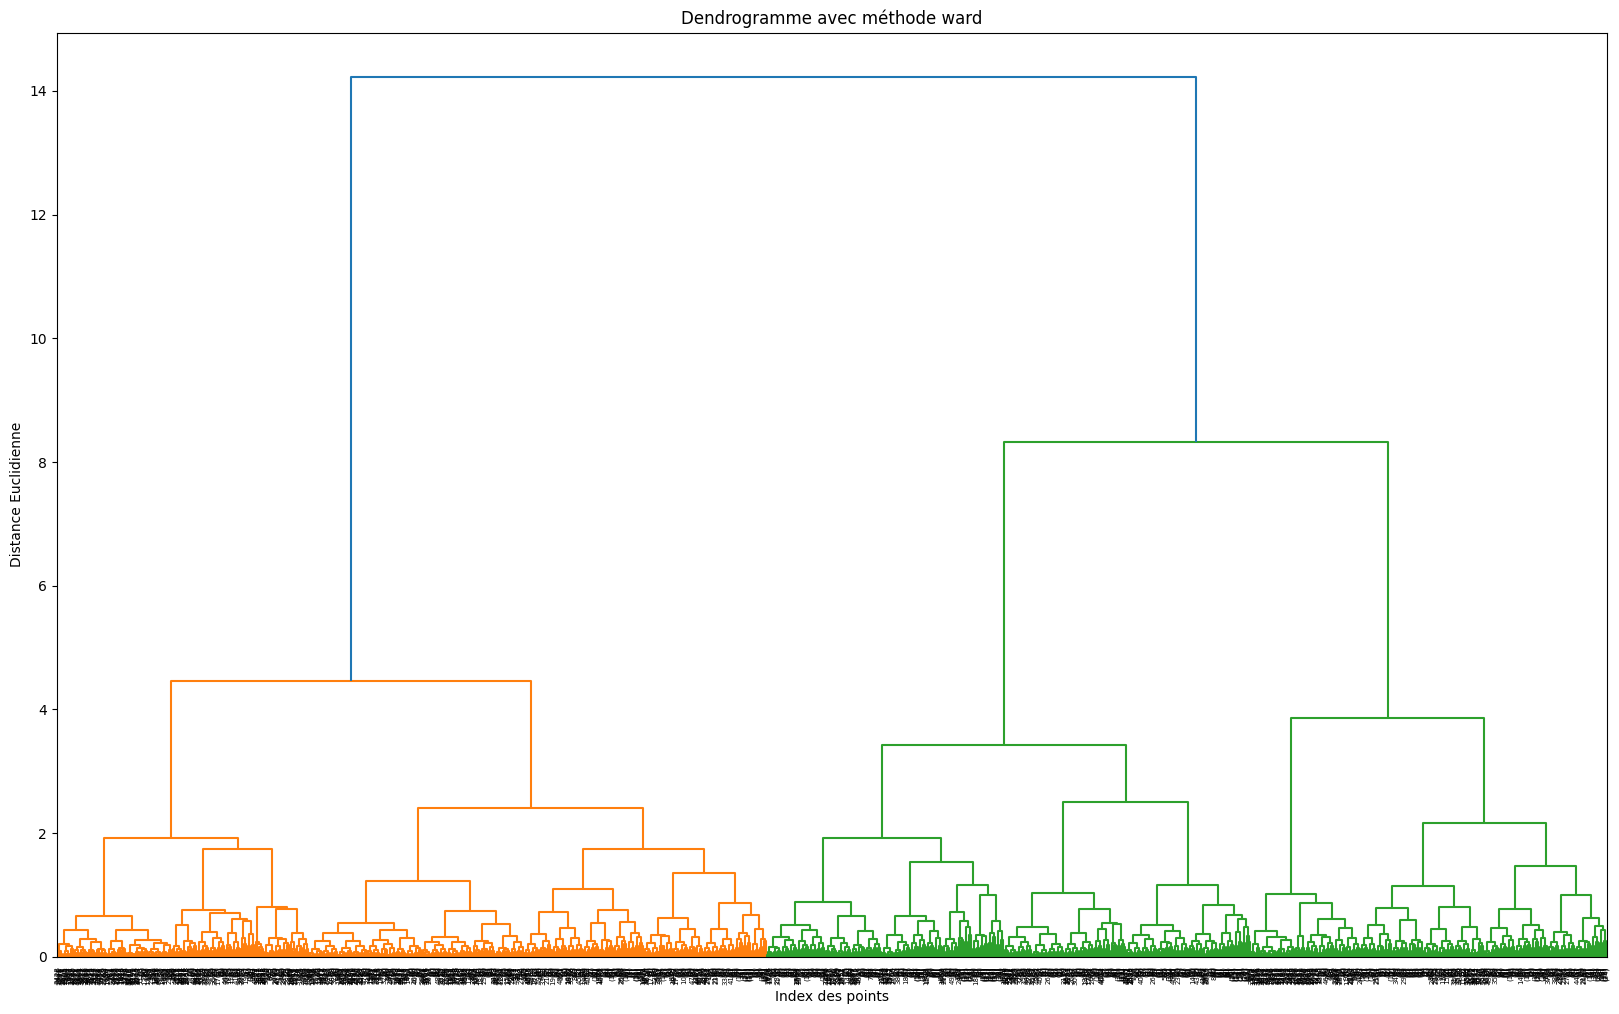

In [6]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import pdist
import sys # import sys to adjust recursion limit


# Créer le clustering hiérarchique
linkage_methods = ['single', 'complete', 'average', 'ward']  # Types de liaisons

for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')

    # Increase recursion limit
    sys.setrecursionlimit(5000)  # Adjust as needed

    # Traçage du dendrogramme
    # Use 'truncate_mode' to simplify the dendrogram
    plt.figure(figsize=(20, 12))
    dendrogram(Z, truncate_mode='level', p=10) # 'level' and 'p' to control the size of the dendrogram
    plt.title(f"Dendrogramme avec méthode {method}")
    plt.xlabel("Index des points")
    plt.ylabel("Distance Euclidienne")
    plt.show()


In [9]:
# Tester différents seuils
thresholds = [5, 10, 15, 20]  # Choisir des seuils basés sur les distances dans les dendrogrammes
for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')
    for thresh in thresholds:
        clusters = fcluster(Z, t=thresh, criterion='distance')

        # Check if we have more than 1 cluster
        if len(set(clusters)) > 1:
            # Évaluation avec le score de silhouette
            silhouette_avg = silhouette_score(features, clusters, metric='euclidean')
            print(f"Méthode: {method}, Seuil: {thresh}, Nombre de clusters: {len(set(clusters))}, Silhouette: {silhouette_avg:.3f}")
        else:
            print(f"Méthode: {method}, Seuil: {thresh}, resulted in only one cluster. Skipping silhouette calculation.")

Méthode: single, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
Méthode: single, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
Méthode: single, Seuil: 15, resulted in only one cluster. Skipping silhouette calculation.
Méthode: single, Seuil: 20, resulted in only one cluster. Skipping silhouette calculation.
Méthode: complete, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
Méthode: complete, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
Méthode: complete, Seuil: 15, resulted in only one cluster. Skipping silhouette calculation.
Méthode: complete, Seuil: 20, resulted in only one cluster. Skipping silhouette calculation.
Méthode: average, Seuil: 5, resulted in only one cluster. Skipping silhouette calculation.
Méthode: average, Seuil: 10, resulted in only one cluster. Skipping silhouette calculation.
Méthode: average, Seuil: 15, resulted in only one cluster. Skipping silhouette calc

Voici une interprétation des résultats obtenus :

---

### 1. **Méthode "single"**
- Pour les seuils 5, 10, 15 et 20, **il n'y a qu'un seul cluster**.
- Cela signifie que la méthode "single" (liaison simple) n'est pas efficace pour vos données à ces seuils. Elle regroupe rapidement tous les points dans un seul cluster, même à de faibles seuils.
- La liaison simple est connue pour être sensible aux points proches, ce qui explique cette tendance à créer un seul cluster.

---

### 2. **Méthode "complete"**
- Résultats similaires à la méthode "single" : pour tous les seuils (5, 10, 15, 20), **un seul cluster est formé**.
- La méthode "complete" (liaison complète) semble également regrouper rapidement les données en un seul cluster à ces seuils.

---

### 3. **Méthode "average"**
- Comme pour "single" et "complete", **un seul cluster** est formé pour tous les seuils testés.
- La méthode "average" (liaison moyenne) est un compromis entre "single" et "complete", mais dans ce cas, elle présente un comportement similaire.

---

### 4. **Méthode "ward"**
- **Seuil 5 :**
  - **Nombre de clusters : 3**
  - **Score de silhouette : 0.309**
  - Cela indique qu'à ce seuil, 3 groupes bien distincts sont formés, mais le score de silhouette (0.309) suggère une séparation modérée entre les clusters.
  
- **Seuil 10 :**
  - **Nombre de clusters : 2**
  - **Score de silhouette : 0.399**
  - À ce seuil, deux clusters sont formés avec une meilleure séparation (score de silhouette plus élevé). Cela pourrait indiquer une structure naturelle à deux groupes dans les données.

- **Seuil 15 et 20 :**
  - **Un seul cluster** est formé, ce qui signifie que le seuil est trop élevé pour capturer des sous-groupes.

---

### 5. **Interprétation globale**
- Les méthodes "single", "complete" et "average" ne donnent pas de résultats exploitables à ces seuils car elles forment un seul cluster. Cela pourrait être dû à des seuils mal ajustés ou à une structure particulière dans vos données.
  
- La méthode **"ward"** produit des clusters significatifs :
  - À un seuil de **5**, elle identifie **3 clusters**, ce qui semble prometteur pour répondre à la question sur la formation de 3 groupes naturels.
  - À un seuil de **10**, elle identifie **2 clusters** avec une meilleure cohérence (silhouette = 0.399).

- Les résultats suggèrent que **la méthode "ward" est la plus adaptée à vos données**, et que vous pourriez ajuster les seuils autour de **5** pour explorer plus en détail la structure en 3 clusters.

---

### 6. **Prochaines étapes**
1. **Analyser les clusters de la méthode "ward" :**
   - Visualisez les données en fonction des clusters obtenus.
   - Vérifiez si les clusters correspondent à des groupes logiques ou des patterns dans vos données.

2. **Ajuster les seuils pour les autres méthodes :**
   - Testez des seuils plus bas pour "single", "complete" et "average" (par exemple, 1, 2, 3) pour voir si des clusters significatifs apparaissent.

3. **Explorer les scores de silhouette :**
   - Essayez de maximiser le score de silhouette pour ajuster le nombre et la qualité des clusters.

Souhaitez-vous que je vous aide à visualiser les clusters ou à ajuster les seuils pour d'autres méthodes ? 😊

In [10]:
# Identifier un seuil qui donne 3 clusters naturellement
for method in linkage_methods:
    Z = linkage(features, method=method, metric='euclidean')
    clusters = fcluster(Z, t=15, criterion='distance')  # Ajuster ce seuil selon vos observations

    if len(set(clusters)) == 3:
        print(f"Trois groupes trouvés avec méthode {method}")
        # Tracer les groupes dans un espace 2D (PCA ou réduction de dimension)
        plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=clusters, cmap='rainbow')
        plt.title(f"Clusters obtenus avec méthode {method} (3 groupes)")
        plt.show()
